<a href="https://colab.research.google.com/github/robertoricci/Curso-Python-para-Mercado-Financeiro-Trading-com-Dados/blob/main/Indicadores_ZigZag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Detectando topos e fundos** 
---

#### Conhecendo os indicadores ZigZag
---

### **ZigZag: Exemplo 1**

In [1]:
!pip install yfinance
!pip install vectorbt
!pip install zigzag

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 748 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 526 kB 4.4 MB/s 
     |████████████████████████████████| 292 kB 40.0 MB/s 
     |████████████████████████████████| 1.6 MB 17.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 126 kB 4.8 MB/s 
  Created wheel for zigzag: filename=ZigZag-0.2.2-cp37-cp37m-linux_x86_64.whl size=445999 sha256=1add71e4fbfb80da16bc965d856a911d59efedae25752b916df8041e16bf0cc6
  Stored in directory: /root/.cache/pip/wheels/cc/74/73/79cdb32dd48bcf66f9fcb3960a84d0f6a6cd

In [2]:
import numpy as np
import pandas as pd

import yfinance as yf
import vectorbt as vbt

import matplotlib.pyplot as plt

import zigzag as zg

In [7]:
close_data = yf.download('^BVSP', start='2005-01-01')['Close']

[*********************100%***********************]  1 of 1 completed


In [11]:
#array com valores de picos e vales               limites maximos e minimos
pivots = zg.peak_valley_pivots(close_data.values, 0.2, -0.2)

ts_pivots = pd.Series(close_data, index=close_data.index)

ts_pivots = ts_pivots[pivots != 0]

ts_pivots.head()

Date
2005-01-03    25722.0
2005-01-20    23610.0
2006-05-09    41979.0
2006-06-13    32848.0
2008-05-20    73517.0
Name: Close, dtype: float64

In [5]:
pivots

array([ 1,  0,  0, ...,  0,  0, -1])

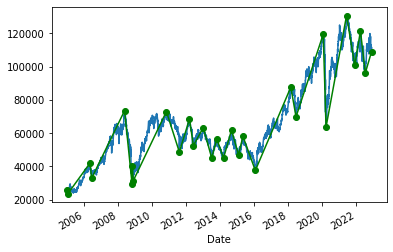

In [12]:
close_data.plot()
ts_pivots.plot(style='g-o');

In [13]:
close_data.vbt.drawdowns.plot(top_n=5).show()

In [ ]:
type(ts_pivots)

pandas.core.series.Series

In [ ]:
ts_pivots.head()

Date
2005-01-03    25722.0
2005-01-20    23610.0
2006-05-09    41979.0
2006-06-13    32848.0
2008-05-20    73517.0
Name: Close, dtype: float64

In [ ]:
ts_pivots_df = ts_pivots.to_frame()
ts_pivots_df.head()

,Close
Date,
2005-01-03,25722.0
2005-01-20,23610.0
2006-05-09,41979.0
2006-06-13,32848.0
2008-05-20,73517.0


In [16]:
ts_pivots_df = ts_pivots.to_frame()
ts_pivots_df['pct_change'] = ts_pivots_df.pct_change()
ts_pivots_df

,Close,pct_change
Date,,
2005-01-03,25722.0,NaN
2005-01-20,23610.0,-0.082109
2006-05-09,41979.0,0.778018
2006-06-13,32848.0,-0.217514
2008-05-20,73517.0,1.238097
2008-10-27,29435.0,-0.599616
2008-11-04,40255.0,0.367590
2008-11-21,31251.0,-0.223674
2010-11-04,72996.0,1.335797


In [14]:
def plot_pivots(close_data, pivots):
    plt.xlim(0, len(close_data))
    plt.ylim(close_data.min()*0.99, close_data.max()*1.01)
    plt.plot(np.arange(len(close_data)), close_data, 'k:', alpha=0.5)
    plt.plot(np.arange(len(close_data))[pivots != 0], close_data[pivots != 0], 'k-')
    plt.scatter(np.arange(len(close_data))[pivots == 1], close_data[pivots == 1], color='g')
    plt.scatter(np.arange(len(close_data))[pivots == -1], close_data[pivots == -1], color='r')

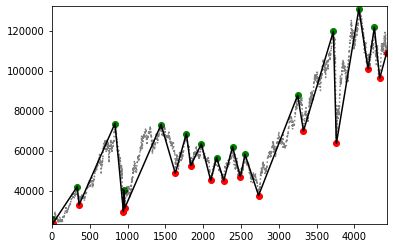

In [17]:
plot_pivots(close_data, pivots)